# **DAY 1**

## **Gathering Data**

### **Dataset**

The dataset we will use is sourced from the website kaggle.com, with the following link: https://www.kaggle.com/code/divyanshwaghmare11/obesity-risk-analysis-decision-tree/input?select=ObesityDataSet_raw_and_data_sinthetic.csv

### **Dataset Overview**

In this Dataset we have to estimate the obesity level of person from Mexico, Peru, Colombia the basis of attributes given in dataset,dataset contains 2111 rows and 17 attributes.

Brief Discription about attributes:

*   **Gender**: categorical variable that shows the biological sex of the individual (male or female)
*   **Age**: numerical variable that shows the individual’s age in years.
*   **Height**: numerical variable that shows the individual's height in meters.
*   **Weight**: numerical variable that shows the individual's weight in kilograms.
*   **Family History of Overweight**: categorical variable that shows if the individual has a family member who is overweight or obese.
*   **Frequently Consumed High-Calorie Food** (FAVC): categorical variable that shows if the individual often eats high-calorie food.
*   **Frequency of Consumption of Vegetables** (FCVC): ordinal variable that shows how often the individual eats vegetable in their meals.
*   **Number of Main Meals** (NCP): ordinal variable that shows how many main meals the individual has daily.
*   **Consumption of Food between Meals** (CAEC): ordinal variable that shows how often the individual eats food between meals.
*   **Smoke**: categorical variable that shows whether the individual smokes or not.
*   **Consumption of Water Daily** (CH2O): ordinal variable that shows how much water the individual drinks daily in liter.
*   **Monitor Calorie Intake** (SCC): categorical variable that shows if the individual keeps track of their caloric intake.
*   **Frequency of Physical Activity** (FAF): ordinal variable that shows how often the individual does physical activity.
*   **Time Using Electronic Devices** (TUE): ordinal variable that shows how long the individual uses electronic devices in hour.
*   **Consumption of Alcohol** (CALC): ordinal variable that shows how often the individual drinks alcohol.
*   **Type of Transportation Used** (MTRANS): categorical variable that shows what kind of transportation the individual uses.
*   **Level of Obesity** (NObesity): ordinal variable that shows the obesity level of the individual according to their BMI.

# **DAY 2**

## **Import Library**

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.tree import DecisionTreeClassifier

# Deep learning model (TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Results
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Warning
import warnings
warnings.filterwarnings("ignore")

## **Load Dataset**

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/leivinaslp/Capstone-Project/main/Dataset/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url)

# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Display the first few rows
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
# Display the count of observations in the dataset
print("There are {} observations present in the dataset".format(df.shape[0]))

# Display the count of attributes in the dataset
print("There are {} attributes present in the dataset".format(df.shape[1]))

There are 2111 observations present in the dataset
There are 17 attributes present in the dataset


In [ ]:
# Generate descriptive statistics for all columns in the dataframe
df.describe(include="all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


## **Assessing and Cleaning Data**

In [ ]:
# Rename the column for better readability
df.rename(columns={"family_history_with_overweight": "Family_History_With_Overweight",
                   "FAVC": "Frequently_Consumed_High-Calorie_Food",
                   "FCVC": "Frequency_of_Consumption_of_Vegetables",
                   "NCP": "Number_of_Main_Meals",
                   "CAEC": "Consumption_of_Food_between_Meals",
                   "SMOKE": "Smoke",
                   "CH2O": "Consumption_of_Water_Daily",
                   "SCC": "Monitor_Calorie_Intake",
                   "FAF": "Frequency_of_Physical_Activity",
                   "TUE": "Time_Using_Electronic_Devices",
                   "CALC": "Consumption_of_Alcohol",
                   "MTRANS": "Type_of_Transportation_Used",
                   "NObeyesdad": "Obesity_Level"}, inplace=True)

In [ ]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  2111 non-null   object 
 1   Age                                     2111 non-null   float64
 2   Height                                  2111 non-null   float64
 3   Weight                                  2111 non-null   float64
 4   Family_History_With_Overweight          2111 non-null   object 
 5   Frequently_Consumed_High-Calorie_Food   2111 non-null   object 
 6   Frequency_of_Consumption_of_Vegetables  2111 non-null   float64
 7   Number_of_Main_Meals                    2111 non-null   float64
 8   Consumption_of_Food_between_Meals       2111 non-null   object 
 9   Smoke                                   2111 non-null   object 
 10  Consumption_of_Water_Daily              2111 non-null   floa

### **Check Missing Value**

In [ ]:
# Calculate the number of null values in each column
df.isnull().sum()  # There is no null values in the table

Gender                                    0
Age                                       0
Height                                    0
Weight                                    0
Family_History_With_Overweight            0
Frequently_Consumed_High-Calorie_Food     0
Frequency_of_Consumption_of_Vegetables    0
Number_of_Main_Meals                      0
Consumption_of_Food_between_Meals         0
Smoke                                     0
Consumption_of_Water_Daily                0
Monitor_Calorie_Intake                    0
Frequency_of_Physical_Activity            0
Time_Using_Electronic_Devices             0
Consumption_of_Alcohol                    0
Type_of_Transportation_Used               0
Obesity_Level                             0
dtype: int64

### **Check Duplicate Value**

In [ ]:
# Check for duplicated rows in the dataframe
df.duplicated().sum()  # There are 24 duplicated rows

24

In [ ]:
# Displaying duplicate rows in the dataframe
df[df.duplicated(keep=False)]

,Gender,Age,Height,Weight,Family_History_With_Overweight,Frequently_Consumed_High-Calorie_Food,Frequency_of_Consumption_of_Vegetables,Number_of_Main_Meals,Consumption_of_Food_between_Meals,Smoke,Consumption_of_Water_Daily,Monitor_Calorie_Intake,Frequency_of_Physical_Activity,Time_Using_Electronic_Devices,Consumption_of_Alcohol,Type_of_Transportation_Used,Obesity_Level
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
# Remove duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

In [ ]:
# Counting the number of duplicate rows after removal
df.duplicated().sum()  # There is no duplicate rows after removal

0

In [ ]:
print("There are {} observations present in the dataset".format(df.shape[0]))

There are 2087 observations present in the dataset


### **Types of Variables**

In [ ]:
# Extract the numerical variables from the dataframe
numerical_var = [var for var in df.columns if df[var].dtype != "O"]
print(numerical_var)

['Age', 'Height', 'Weight', 'Frequency_of_Consumption_of_Vegetables', 'Number_of_Main_Meals', 'Consumption_of_Water_Daily', 'Frequency_of_Physical_Activity', 'Time_Using_Electronic_Devices']


In [ ]:
# Extract the categorical variables from the dataframe
categorical_var = [var for var in df.columns if var not in numerical_var]
print(categorical_var)

['Gender', 'Family_History_With_Overweight', 'Frequently_Consumed_High-Calorie_Food', 'Consumption_of_Food_between_Meals', 'Smoke', 'Monitor_Calorie_Intake', 'Consumption_of_Alcohol', 'Type_of_Transportation_Used', 'Obesity_Level']


## **Exploratory Data Analysis and Data Visualization**

### **Histogram**

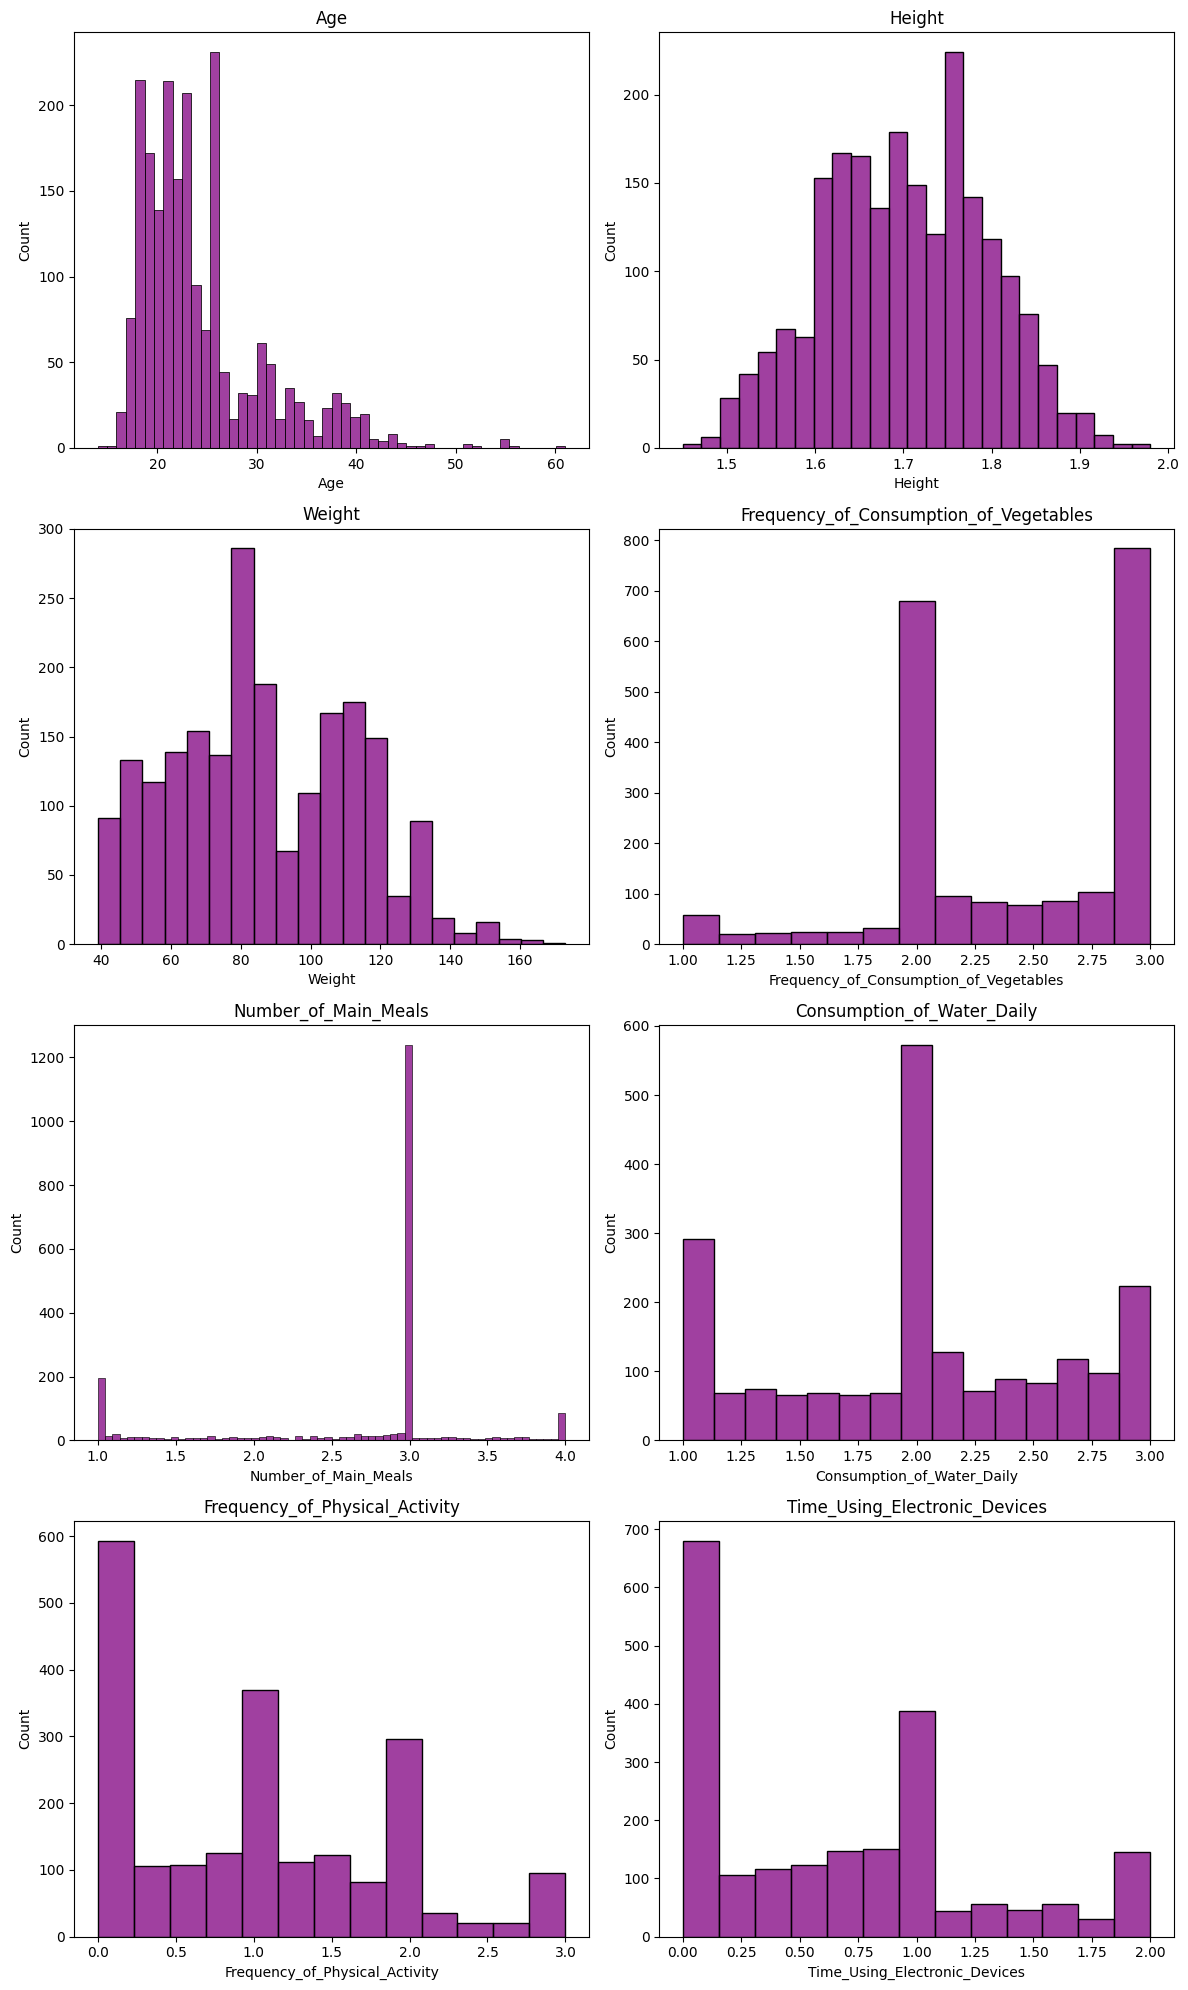

In [ ]:
# Plot histograms for the numerical variables
plt.figure(figsize=(12, 20))  # Set the figure size to 12 by 20 inches
counter = 1  # Initialize a counter for the subplot index
for var in numerical_var:  # Iterate over each numerical variable
    if counter < 10:  # Ensure there are no more than 8 subplots
        plt.subplot(4, 2, counter)  # Create a subplot in a grid of 4 rows and 2 columns
        sns.histplot(x=var, data=df, color='purple')  # Create a histogram for the variable
        plt.title(var)  # Set the title of the subplot to the variable name
    counter += 1  # Increment the counter
plt.tight_layout()  # Adjust the layout to prevent overlapping

- The dataset indicates that the largest proportion of individuals fall within the age range of 18 to 26 years.
- Height distribution suggests that the majority of people have heights ranging from 160cm to 180cm.
- Weight distribution shows that the highest concentration of individuals falls between 40kg to 120kg.
- Analysis of vegetable consumption indicates that a significant number of people eat vegetables 2 to 3 times per day.
- The majority of individuals typically have 1 to 3 meals daily based on the dataset.
- Water intake analysis suggests that most people consume 1 to 3 liters of water per day.
- A significant portion of the population does not engage in physical activity, while others participate in exercise 1 to 2 times daily, as per the dataset.

### **Box Plot**

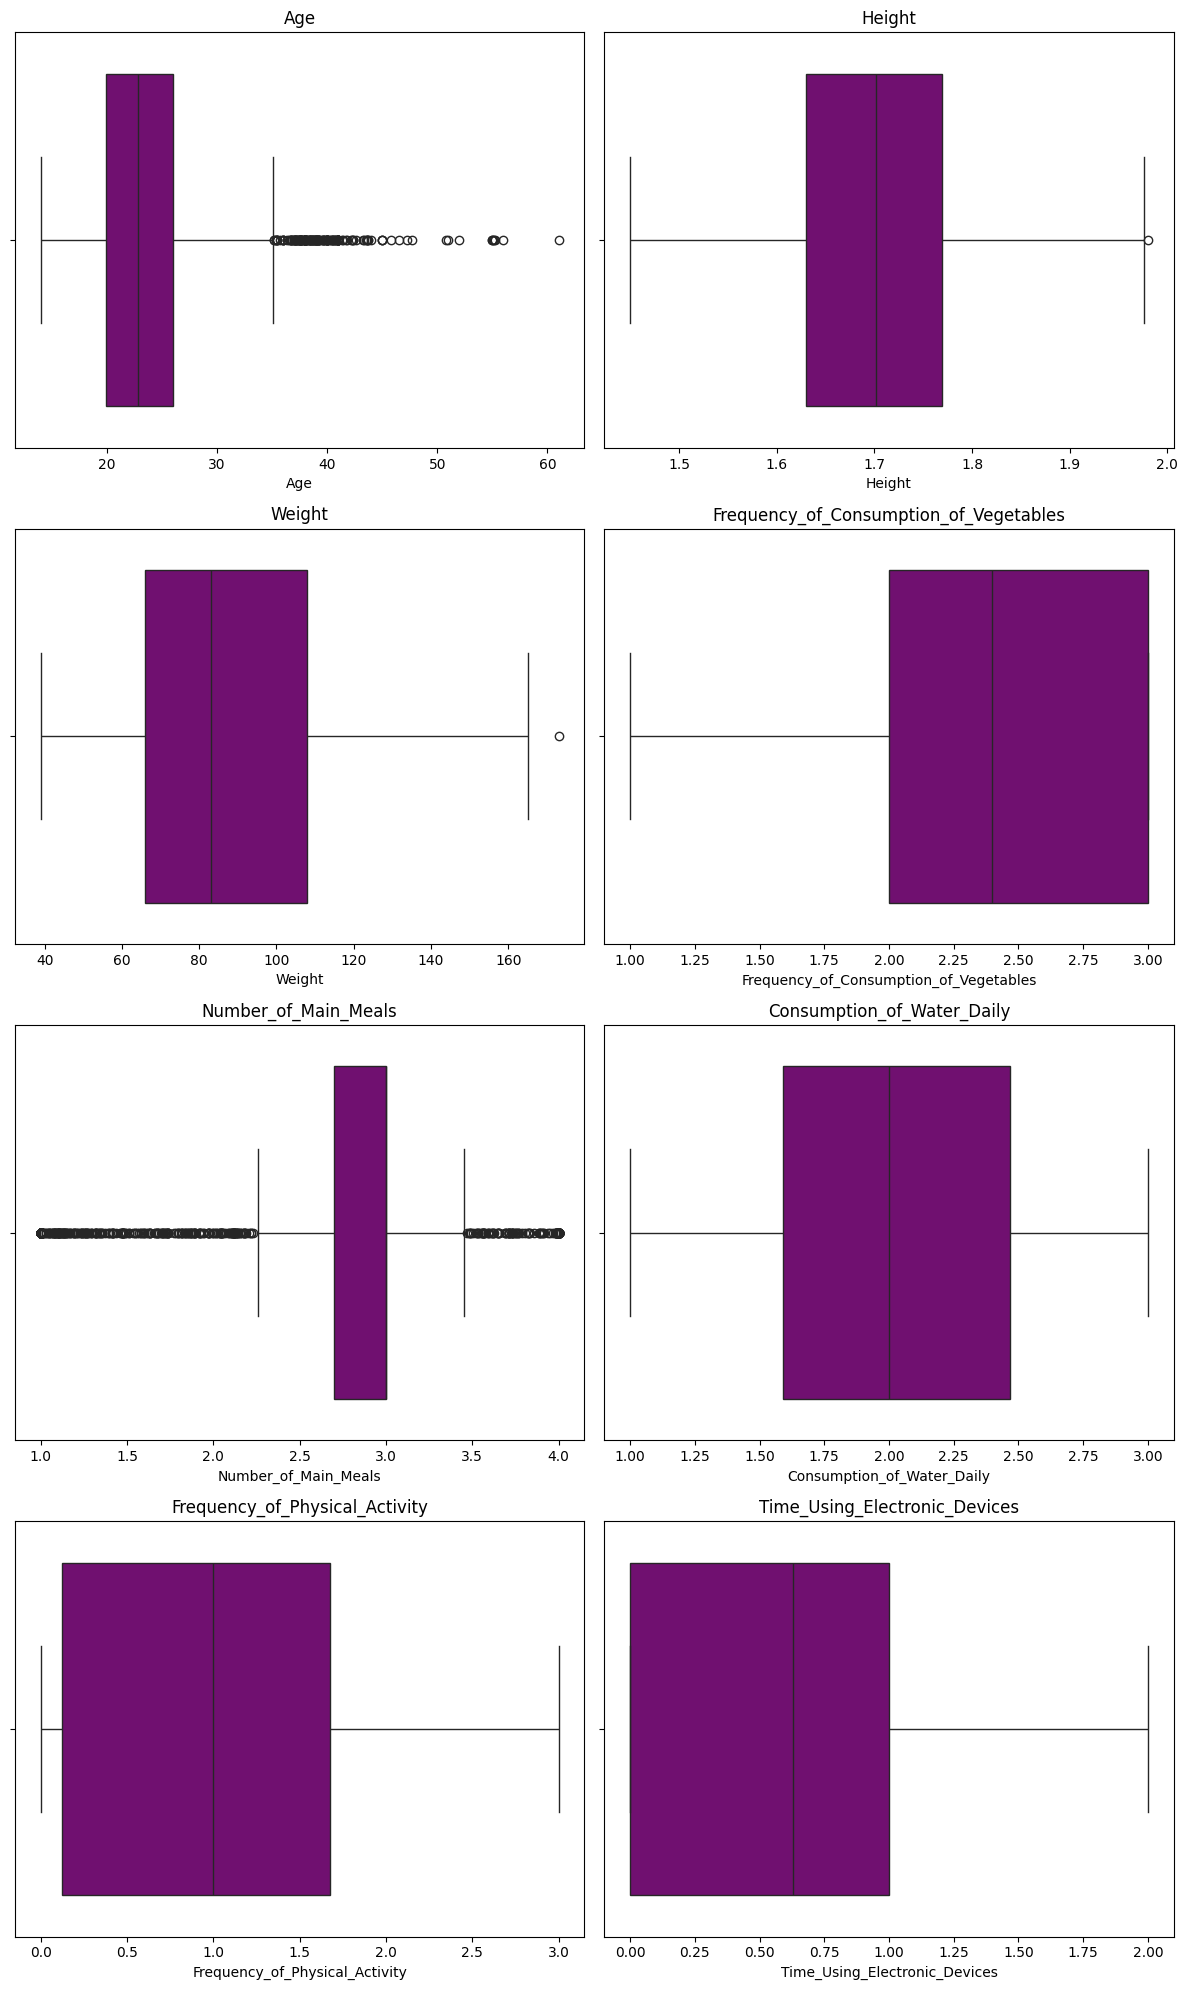

In [ ]:
# Plot box plots for the numerical variables
plt.figure(figsize=(12, 20))  # Set the figure size to 12 by 20 inches
counter = 1  # Initialize a counter for the subplot index
for var in numerical_var:  # Iterate over each numerical variable
    if counter < 10:  # Ensure there are no more than 8 subplots
        plt.subplot(4, 2, counter)  # Create a subplot in a grid of 4 rows and 2 columns
        sns.boxplot(x=var, data=df, color='purple')  # Create a box plot for the variable
        plt.title(var)  # Set the title of the subplot to the variable name
    counter += 1  # Increment the counter
plt.tight_layout()  # Adjust the layout to prevent overlapping

### **Pie Chart**

In [ ]:
# Calculate the value counts of the 'Obesity_Level' variable
counts = df.Obesity_Level.value_counts()  # Calculate the frequency of each category in the 'Obesity_Level' variable

# Create a dataframe from the value counts
long_format_df = pd.DataFrame({'Type': counts.index, 'Count': counts.values})  # Create a new dataframe from the counts with columns 'Type' and 'Count'

# Create a pie chart using plotly express in long format
fig = px.pie(data_frame = long_format_df, names = 'Type', values = 'Count', title = "Type of Obesity", color_discrete_sequence=px.colors.sequential.Viridis)  # Create a pie chart using plotly express
fig.update_traces(textposition = 'inside', textinfo='label+percent')  # Update the traces to display labels and percentages inside the pie chart
fig.show()  # Display the pie chart

Our target variable is divided into seven distinct categories: 'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', and 'Insufficient_Weight'. These categories are evenly distributed, each comprising between 12% and 16% of the total.

### **Bar Chart**

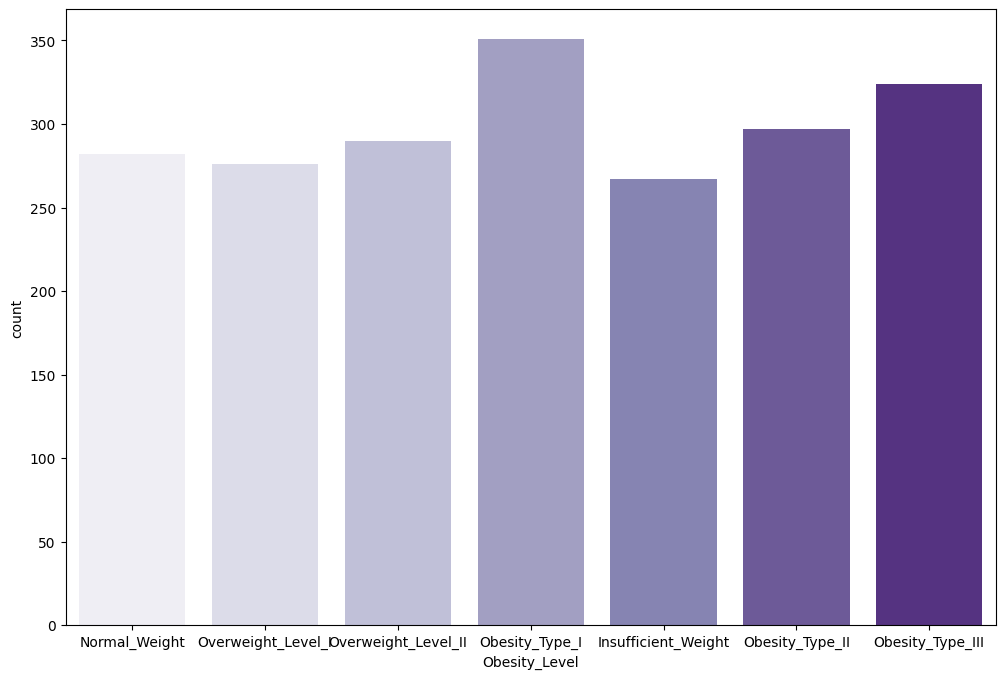

In [ ]:
# Plot bar chart for the numerical variables
plt.figure(figsize = (12,8))  # Set the figure size to 12 by 8 inches
sns.countplot(x ="Obesity_Level", data = df, palette="Purples")  # Create a count plot for the Obesity_Level variable
plt.show()  # Display the plot

Our target variable is divided into seven distinct categories: 'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', and 'Insufficient_Weight'. These categories are evenly distributed, each comprising between 250 and 350 observations.

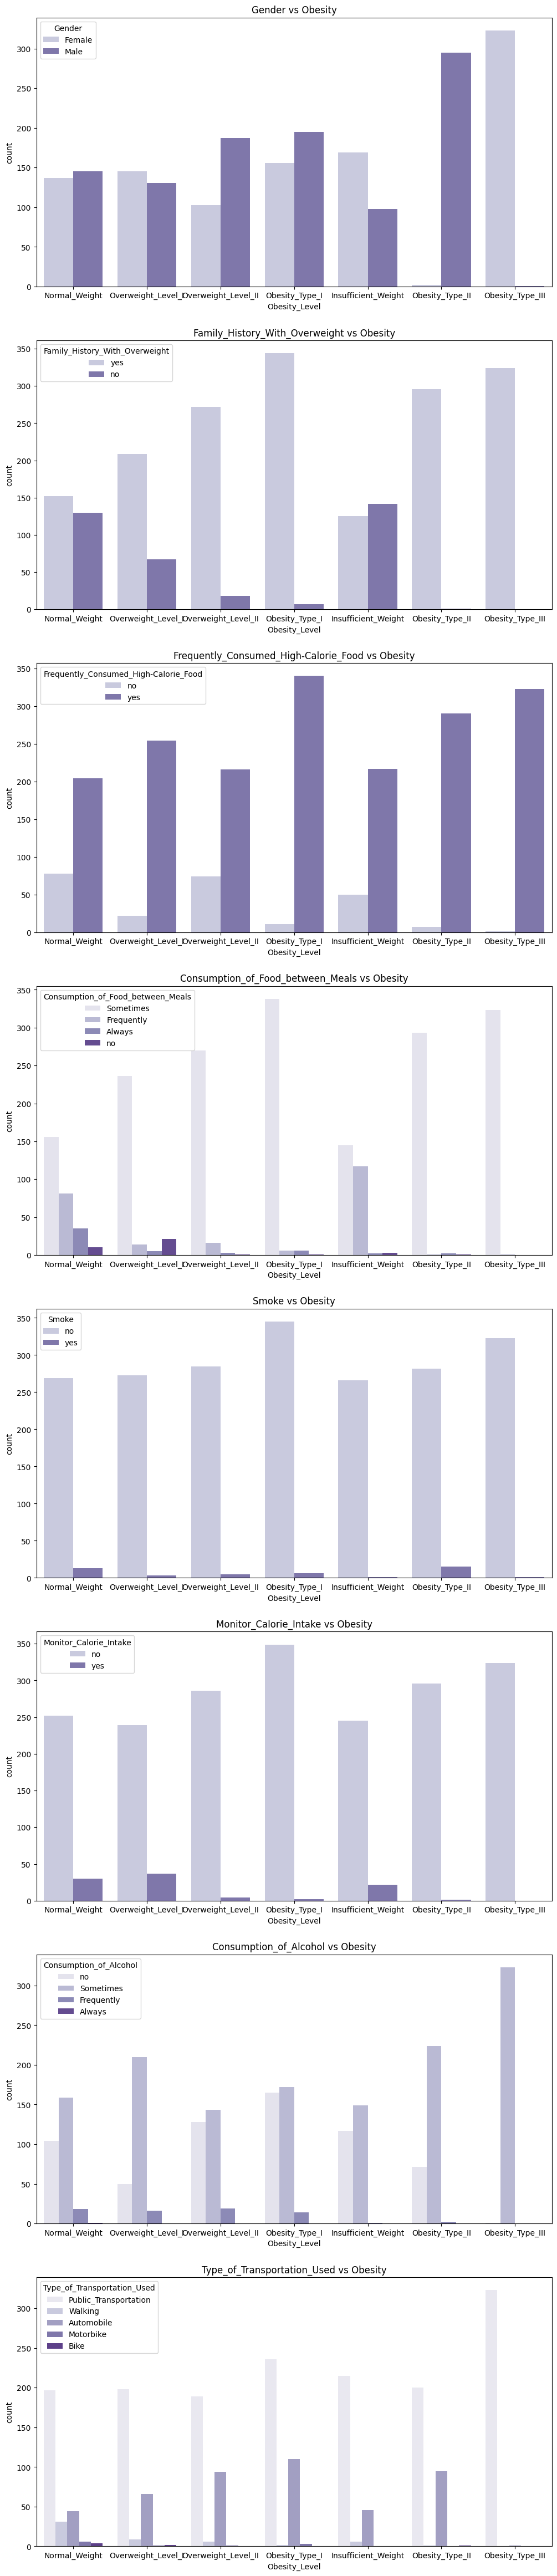

In [ ]:
# Plotting categorical variables against Obesity_Level
plt.figure(figsize = (12,150))  # Set the figure size to 12 by 150 inches
counter = 1  # Initialize a counter for the subplot index
for var in categorical_var:  # Iterate over each categorical variable
    if counter < 9:  # Ensure there are no more than 8 subplots
        plt.subplot(20,1,counter)  # Create a subplot in a grid of 20 rows and 1 column
        plt.title(f"{var} vs Obesity")  # Set the title of the subplot
        sns.countplot(x = "Obesity_Level" , hue = var, data = df, palette="Purples")  # Create a count plot for the variable against Obesity_Level
    counter +=1  # Increment the counter
plt.show()  # Display the plot

- Some types of obesity have more men (Obesity_Type_II) or more women (Obesity_Type_III).
- Having family members with obesity can increase the chances of having it.
- Not keeping track of calories can lead to obesity.
- Smoking doesn't seem to be strongly connected to obesity.
- Drinking alcohol is linked to certain types of obesity and being overweight.
- Using public transport instead of walking or biking might make it harder to burn calories and could lead to obesity.

### **Correlation Tabel**

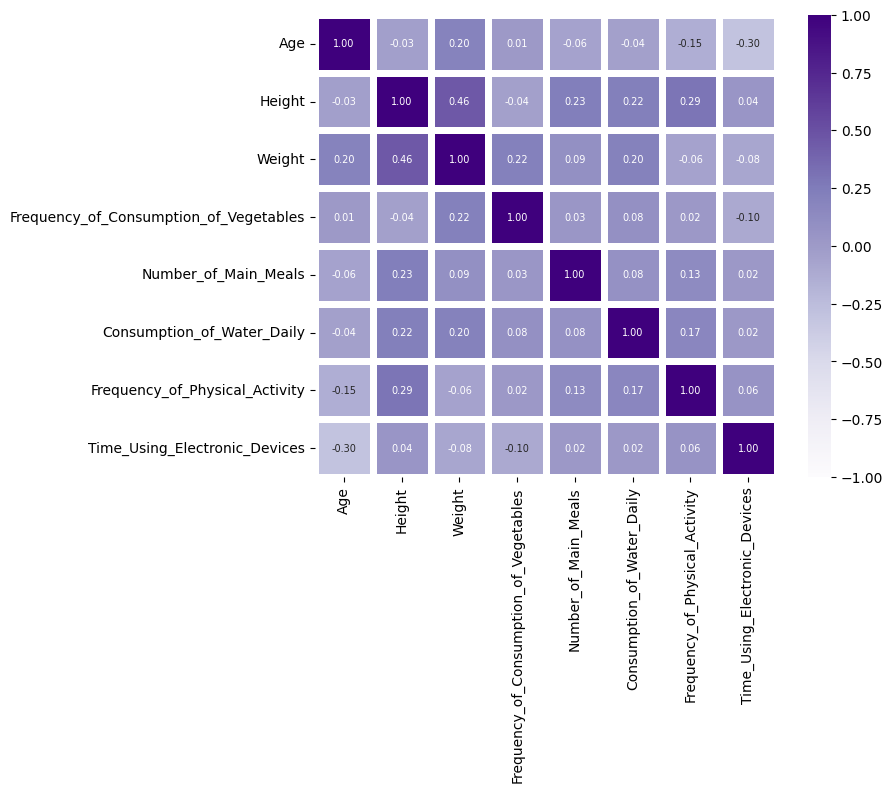

In [ ]:
# Plotting correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))  # Set the figure size to 8 by 6 inches
df1 = df.loc[:, numerical_var]  # Select only the numerical variables from the dataframe
sns.heatmap(df1.corr(), annot=True, square=True, center=0, vmin=-1, vmax=1, cmap='Purples', fmt='.2f', linewidths=5, annot_kws={"size": 7})  # Create a heatmap of the correlation matrix with annotations
plt.show()  # Display the plot

# **DAY 3 - 4**

### **Encoding Categorical Columns**

In [ ]:
# Gender
df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})

# Family_History_With_Overweight
df['Family_History_With_Overweight'] = df['Family_History_With_Overweight'].map({"yes": 1, "no": 0})

# Frequently_Consumed_High-Calorie_Food
df['Frequently_Consumed_High-Calorie_Food'] = df['Frequently_Consumed_High-Calorie_Food'].map({"yes": 1, "no": 0})

# Consumption_of_Food_between_Meals
df['Consumption_of_Food_between_Meals'] = df['Consumption_of_Food_between_Meals'].map({
    "Always": 3,
    "Frequently": 2,
    "Sometimes": 1,
    "no": 0
})

# Smoke
df['Smoke'] = df['Smoke'].map({"yes": 1, "no": 0})

# Monitor Calorie Intake
df['Monitor_Calorie_Intake'] = df['Monitor_Calorie_Intake'].map({"yes": 1, "no": 0})

# Consumption of Alcohol
df['Consumption_of_Alcohol'] = df['Consumption_of_Alcohol'].map({
    "Always": 3,
    "Frequently": 2,
    "Sometimes": 1,
    "no": 0
})

# Type of Transportation
df['Type_of_Transportation_Used'] = df['Type_of_Transportation_Used'].map({
    'Public_Transportation': 4,
    'Walking': 2,
    'Automobile': 3,
    'Motorbike': 1,
    'Bike': 0
})

# Obesity Level
df['Obesity_Level'] = df['Obesity_Level'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
})

In [ ]:
# Display basic information
print(df[:5])

   Gender   Age  Height  Weight  Family_History_With_Overweight  \
0       0  21.0    1.62    64.0                               1   
1       0  21.0    1.52    56.0                               1   
2       1  23.0    1.80    77.0                               1   
3       1  27.0    1.80    87.0                               0   
4       1  22.0    1.78    89.8                               0   

   Frequently_Consumed_High-Calorie_Food  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Frequency_of_Consumption_of_Vegetables  Number_of_Main_Meals  \
0                                     2.0                   3.0   
1                                     3.0                   3.0   
2                                     2.0                   3.0   
3                                     3.0                   3.0 

### **Scaling Numerical Value**

In [ ]:
# Standardizing numeric columns Age, Height, and Weight
scaler = StandardScaler()  # Initialize the StandardScaler
numeric_cols = ['Age', 'Height', 'Weight']  # List of numeric columns to standardize
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Fit and transform the specified columns

### **Target and Feature Definition**

In [ ]:
# Defining target variable and features
target = df['Obesity_Level']  # Target variable (dependent variable)
features = df.drop(columns=['Obesity_Level'])  # Features (independent variables)

### **Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold
# Set a threshold (e.g., 0.01)
threshold = 0.01
selector = VarianceThreshold(threshold)
selector.fit(features)

# Get the mask of features that are retained
mask = selector.get_support()

# Get the list of retained features
retained_features = features.columns[mask]

# Analyze the results
print(f"Retained features ({len(retained_features)}): {list(retained_features)}")
print(f"Removed features ({len(features.columns) - len(retained_features)}): {list(features.columns[~mask])}")

# Calculate variances of the features
variances = features.var()

# Get the list of retained features and their variances
retained_features = features.columns[mask]
retained_variances = variances[mask]

# Get the list of removed features and their variances
removed_features = features.columns[~mask]
removed_variances = variances[~mask]

# Analyze the results
print("Variances of retained features:")
for feature, variance in zip(retained_features, retained_variances):
    print(f"{feature}: {variance}")

print("\nVariances of removed features:")
for feature, variance in zip(removed_features, removed_variances):
    print(f"{feature}: {variance}")

Retained features (16): ['Gender', 'Age', 'Height', 'Weight', 'Family_History_With_Overweight', 'Frequently_Consumed_High-Calorie_Food', 'Frequency_of_Consumption_of_Vegetables', 'Number_of_Main_Meals', 'Consumption_of_Food_between_Meals', 'Smoke', 'Consumption_of_Water_Daily', 'Monitor_Calorie_Intake', 'Frequency_of_Physical_Activity', 'Time_Using_Electronic_Devices', 'Consumption_of_Alcohol', 'Type_of_Transportation_Used']
Removed features (0): []
Variances of retained features:
Gender: 0.2501032506853135
Age: 1.0004793863854267
Height: 1.0004793863854269
Weight: 1.0004793863854267
Family_History_With_Overweight: 0.14437408952190453
Frequently_Consumed_High-Calorie_Food: 0.10292726603670348
Frequency_of_Consumption_of_Vegetables: 0.28594322351935214
Number_of_Main_Meals: 0.5846353140884067
Consumption_of_Food_between_Meals: 0.2111344436476365
Smoke: 0.020648299453173348
Consumption_of_Water_Daily: 0.3700098722816143
Monitor_Calorie_Intake: 0.04390416682554333
Frequency_of_Physical_Ac

The variance threshold analysis shows that all features have enough variation and none were removed. This means every feature is useful for the model, and there are no features with very low variance that need to be excluded.

### **Dataset Splitting**

In [ ]:
# Import the necessary library for data splitting
from sklearn.model_selection import train_test_split

# Split the dataset into training and temporary sets (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

# Split the temporary set into validation and test sets (50% validation, 50% test of the 20% temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, test_size=0.5, random_state=42, shuffle=True)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1669, 16) (1669,)
Validation set shape: (209, 16) (209,)
Test set shape: (209, 16) (209,)


The data splitting resulted in:

Training set: 80% of the data, with 1669 samples.

Validation set: 10% of the data, with 209 samples.

Test set: 10% of the data, with 209 samples.

### **Neural Network Model Definition and Training**

Epoch 1/100
53/53 [==============================] - 4s 19ms/step - loss: 1.9144 - accuracy: 0.2097 - val_loss: 1.7439 - val_accuracy: 0.3206
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 1.6398 - accuracy: 0.3014 - val_loss: 1.3056 - val_accuracy: 0.5024
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 1.3382 - accuracy: 0.4062 - val_loss: 1.0751 - val_accuracy: 0.5024
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 1.1359 - accuracy: 0.4889 - val_loss: 0.8288 - val_accuracy: 0.6555
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.9950 - accuracy: 0.5632 - val_loss: 0.7086 - val_accuracy: 0.7129
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.8561 - accuracy: 0.6081 - val_loss: 0.5835 - val_accuracy: 0.7416
Epoch 7/100
53/53 [==============================] - 0s 4ms/step - loss: 0.7778 - accuracy: 0.6369 - val_loss: 0.5245 - val_accuracy: 0.8325
Epoch 8/100


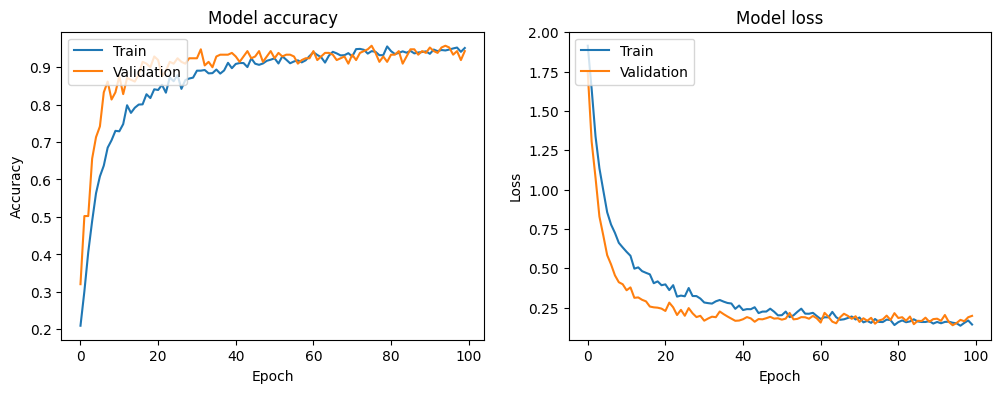

7/7 [==============================] - 0s 4ms/step - loss: 0.1546 - accuracy: 0.9474
Test loss: 0.15462914109230042
Test accuracy: 0.9473684430122375


In [ ]:
# Define the neural network model without Dropout
model = Sequential()  # Initialize a Sequential model

# Add input layer and hidden layers with 16 neurons
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Add a Dense layer with 16 neurons and 'relu' activation function
model.add(Dense(32, activation='relu'))  # Add another Dense layer with 32 neurons and 'relu' activation function
model.add(Dropout(0.2))  # Add Dropout layer with a rate of 0.2
model.add(Dense(64, activation='relu'))  # Add another Dense layer with 32 neurons and 'relu' activation function
model.add(Dropout(0.2))  # Add Dropout layer with a rate of 0.2
model.add(Dense(64, activation='relu'))  # Add another Dense layer with 32 neurons and 'relu' activation function
model.add(Dropout(0.2))  # Add Dropout layer with a rate of 0.2
model.add(Dense(128, activation='relu'))  # Add another Dense layer with 32 neurons and 'relu' activation function
model.add(Dropout(0.2))  # Add Dropout layer with a rate of 0.2
# Add output layer
model.add(Dense(7, activation='softmax'))  # Add a Dense output layer with 7 neurons (for 7 classes) and 'softmax' activation function

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' as the loss function (since the target variable is not one-hot encoded)
              optimizer='adam',  # Use the Adam optimizer
              metrics=['accuracy'])  # Use 'accuracy' as the metric to optimize for during training

# Train the model
history = model.fit(X_train, y_train,  # Training data
                    epochs=100,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_data=(X_val, y_val))  # Validation data

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

In [ ]:
# Display the model summary
model

In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

**Model Architecture**: Model Type: Sequential model, layers are stacked sequentially.

**Input Layer**: Dense: 16 neurons, ReLU activation.

**Hidden Layers**:

*   Dense: 32 neurons, ReLU activation.
*   Dropout: Regularization (20% dropout rate).
*   Dense: 64 neurons, ReLU activation.
*   Dropout: Regularization (20% dropout rate).
*   Dense: 64 neurons, ReLU activation.
*   Dropout: Regularization (20% dropout rate).
*   Dense: 128 neurons, ReLU activation.
*   Dropout: Regularization (20% dropout rate).

**Output Layer**: Dense: 7 neurons, softmax activation (for multiclass classification).

**Parameters**: Total Trainable Parameters: 16,311. Non-trainable Parameters: 0.

**Summary**: This model uses multiple layers of neurons with ReLU activation to process the input data and extract features. Dropout layers are used to prevent overfitting during training. The output layer employs softmax activation to classify input data into 7 different classes.

# **DAY 5**

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Training Loss: 0.08154977858066559
Training Accuracy: 0.971839427947998
Validation Loss: 0.19763275980949402
Validation Accuracy: 0.9425837397575378
Test Loss: 0.15462914109230042
Test Accuracy: 0.9473684430122375


*   Training Loss (0.0815): Low, indicating that the model effectively minimized prediction errors on the training data.
*   Training Accuracy (0.9718): High, indicating that the model correctly predicted around 97.18% of the training data.
*   Validation Loss (0.1976): Slightly higher, indicating that the model performs adequately on unseen validation data.
*   Validation Accuracy (0.9426): High, indicating that the model correctly predicted around 94.26% of the validation data.
*   Test Loss (0.1546): Low, although slightly higher than the training loss, indicating that the model performs well on unseen test data.
*   Test Accuracy (0.9474): High, indicating that the model correctly predicted around 94.74% of the test data.

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Display metrics
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

7/7 [==============================] - 0s 11ms/step
F1 Score: 0.9474822678025956
Precision: 0.9493138727088729
Recall: 0.9473684210526315
Accuracy: 0.9473684210526315


*   F1 Score (0.9475): Indicates a good balance between precision and recall.
*   Precision (0.9493): About 94.93% of predicted positive cases are actually positive.
*   Recall (0.9474): About 94.74% of actual positive cases are correctly predicted.
*   Accuracy (0.9474): Overall, the model predicts correctly 94.74% of the cases.

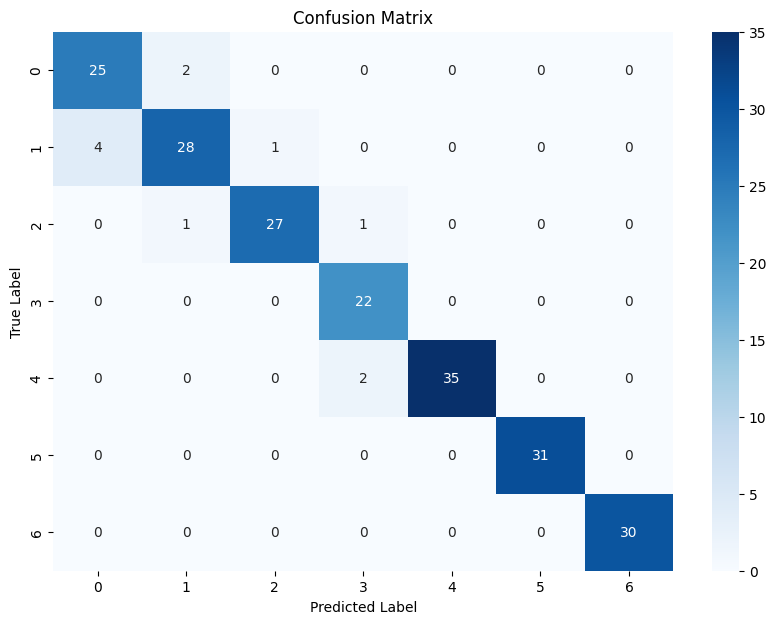

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix indicates that the classification model performs well overall, with a high number of correct predictions (true positives) for each class. Most classes have minimal misclassifications, showing that the model can accurately distinguish between different classes. However, there are some areas of improvement, particularly where class 1 is sometimes confused with class 0 and class 4 with class 5. Addressing these specific misclassifications could further enhance the model's accuracy. Overall, the model demonstrates strong performance with relatively few errors.

### **Save Model in .h5 Format**

In [ ]:
# Save the model to a file
model.save('model3.h5')

# Load the model from the file
model = tf.keras.models.load_model('model3.h5')

### **Predicting Obesity Levels from User Input using a Pre-trained Model.**

In [ ]:
# Function to get user input
def get_user_input():
    data = {}
    data['Gender'] = int(input("What is your gender? (Male=1, Female=0): "))
    data['Age'] = float(input("What is your age (in years): "))
    data['Height'] = float(input("How tall are you (in meters): "))
    data['Weight'] = float(input("How much do you weigh (in kilograms): "))
    data['Family_History_With_Overweight'] = int(input("Does anyone in your family suffer from overweight/obesity? (1=yes, 0=no): "))
    data['Frequently_Consumed_High-Calorie_Food'] = int(input("Do you frequently consume high-calorie food? (1=yes, 0=no): "))
    data['Frequency_of_Consumption_of_Vegetables'] = int(input("Do you usually eat vegetables in your meals? (1=Never, 2=Sometimes, 3=Always): "))
    data['Number_of_Main_Meals'] = int(input("How many main meals do you eat per day? (1=1 or 2 meals, 2=3 meals, 3=More than 3 meals): "))
    data['Consumption_of_Food_between_Meals'] = int(input("Do you eat any food between meals? (0=No, 1=Sometimes, 2=Frequently, 3=Always): "))
    data['Smoke'] = int(input("Do you smoke? (1=yes, 0=no): "))
    data['Consumption_of_Water_Daily'] = int(input("How much water do you drink daily? (1=Less than 1 liter, 2=1-2 liters, 3=More than 2 liters): "))
    data['Monitor_Calorie_Intake'] = int(input("Do you monitor the calories you eat daily? (yes=1, no=0): "))
    data['Frequency_of_Physical_Activity'] = int(input("How often do you participate in physical activity? (0=No physical activity, 1=1-2 days a week, 2=3-4 days a week, 3=5 or more days a week): "))
    data['Time_Using_Electronic_Devices'] = int(input("How much time do you use technological devices such ascell phone, videogames, television, computer and others? (0=0-2 hours, 1=3-5 hours, 2=More than 5 hours): "))
    data['Consumption_of_Alcohol'] = int(input("How often do you consume alcohol? (0=Never, 1=Sometimes, 2=Frequently, 3=Always): "))
    data['Type_of_Transportation_Used'] = int(input("What type of transportation do you use? (0=Bike, 1=Motorbike, 2=Walking, 3=Automobile, 4=Public Transportation): "))

    return data

# Function to preprocess input
def preprocess_input(data):
    df_input = pd.DataFrame([data])

    # Ensure numeric columns match the training data
    numeric_cols = ['Age', 'Height', 'Weight']

    # Transform numeric columns with StandardScaler
    df_input[numeric_cols] = scaler.transform(df_input[numeric_cols])

    return df_input

# Function to make prediction
def predict_obesity_level(model, df_input):
    prediction = model.predict(df_input)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Example of using the functions
user_input = get_user_input()
processed_input = preprocess_input(user_input)
predicted_obesity_level = predict_obesity_level(model, processed_input)

# Mapping predicted label to original labels
label_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

print(f"The predicted Obesity Level is: {label_mapping[predicted_obesity_level]}")

What is your gender? (Male=1, Female=0): 1
What is your age (in years): 30.0
How tall are you (in meters): 1.75
How much do you weigh (in kilograms): 70.0
Does anyone in your family suffer from overweight/obesity? (1=yes, 0=no): 0
Do you frequently consume high-calorie food? (1=yes, 0=no): 0
Do you usually eat vegetables in your meals? (1=Never, 2=Sometimes, 3=Always): 3
How many main meals do you eat per day? (1=1 or 2 meals, 2=3 meals, 3=More than 3 meals): 2
Do you eat any food between meals? (0=No, 1=Sometimes, 2=Frequently, 3=Always): 1
Do you smoke? (1=yes, 0=no): 0
How much water do you drink daily? (1=Less than 1 liter, 2=1-2 liters, 3=More than 2 liters): 3
Do you monitor the calories you eat daily? (yes=1, no=0): 0
How often do you participate in physical activity? (0=No physical activity, 1=1-2 days a week, 2=3-4 days a week, 3=5 or more days a week): 3
How much time do you use technological devices such ascell phone, videogames, television, computer and others? (0=0-2 hours